In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dewanakretarta/mobile-legend-playstore-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 18.2M/18.2M [00:15<00:00, 1.20MB/s]

Extracting files...


Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\dewanakretarta\mobile-legend-playstore-dataset\versions\13


In [9]:
import pandas as pd

# Ganti nama file sesuai dengan yang ada di folder dataset
file_path = r"C:\Users\ASUS\.cache\kagglehub\datasets\dewanakretarta\mobile-legend-playstore-dataset\versions\13\mobile_legend_data.csv"

df = pd.read_csv(r"C:\Users\ASUS\.cache\kagglehub\datasets\dewanakretarta\mobile-legend-playstore-dataset\versions\13\mobilelegends.csv")

# Cek 5 data pertama
print(df.head())


                               reviewId         userName  \
0  77ee0d07-6cce-4360-b4b9-b33b70dbe873  Pengguna Google   
1  9197856d-ecd5-4f44-91e9-9f9b150286db  Pengguna Google   
2  c12713b1-422c-46da-961e-6227d0ab5437  Pengguna Google   
3  6b802eee-8978-4f2c-b467-d84bfcf20021  Pengguna Google   
4  cc58603f-8d69-4937-8d13-62ad1260828d  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  GAME GAK JELAS NGASIH TIM GAK ADIL PERCUMA GW ...      1              1   
1                                      GAME TERTOLOL      1              1   
2       game matchmaking sampah,skill perbedaan jauh      1         

In [10]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297000 entries, 0 to 296999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              297000 non-null  object
 1   userName              297000 non-null  object
 2   userImage             297000 non-null  object
 3   content               296999 non-null  object
 4   score                 297000 non-null  int64 
 5   thumbsUpCount         297000 non-null  int64 
 6   reviewCreatedVersion  218861 non-null  object
 7   at                    297000 non-null  object
 8   replyContent          5029 non-null    object
 9   repliedAt             5029 non-null    object
 10  appVersion            218861 non-null  object
dtypes: int64(2), object(9)
memory usage: 24.9+ MB


,score,thumbsUpCount
count,297000.000000,297000.000000
mean,3.348552,2.500660
std,1.849178,121.977172
min,1.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,44493.000000


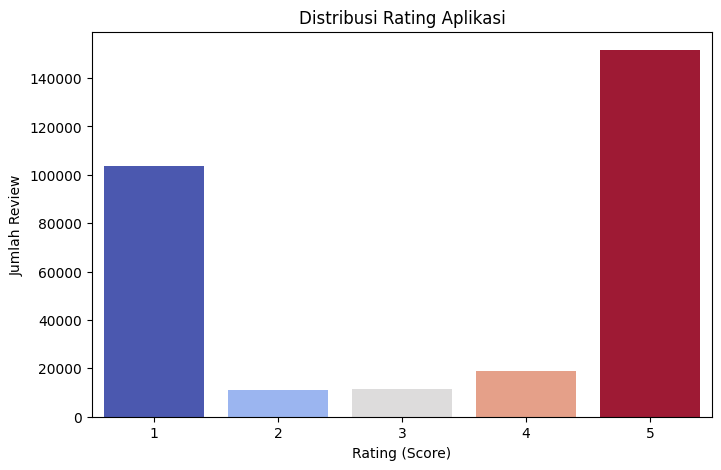

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi rating
plt.figure(figsize=(8, 5))
sns.countplot(x=df['score'], hue=df['score'], palette='coolwarm', legend=False)
plt.xlabel("Rating (Score)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Rating Aplikasi")
plt.show()

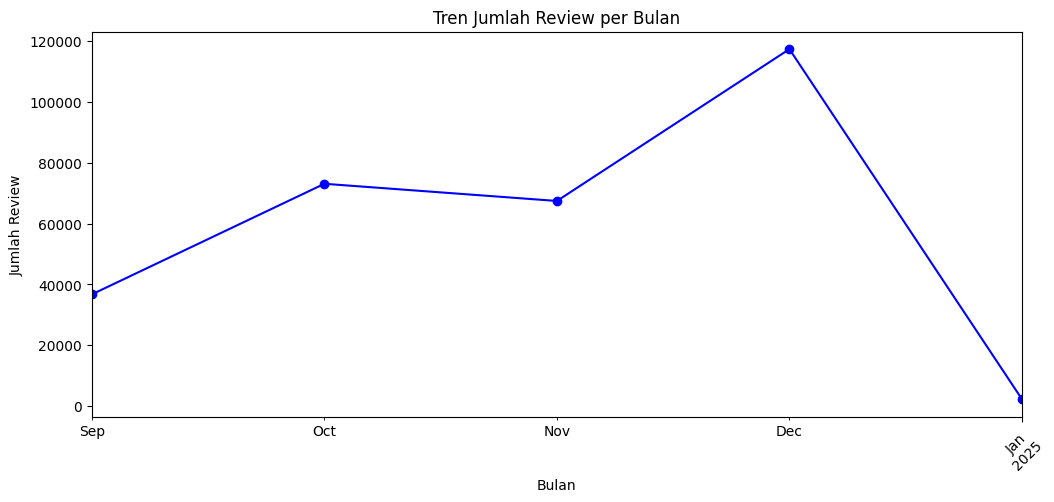

In [13]:
import pandas as pd

# Ubah kolom 'at' menjadi datetime
df['at'] = pd.to_datetime(df['at'])

# Hitung jumlah review per bulan
df['year_month'] = df['at'].dt.to_period('M')
review_trend = df.groupby('year_month').size()

# Plot tren jumlah review
plt.figure(figsize=(12, 5))
review_trend.plot(marker='o', color='b')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Review")
plt.title("Tren Jumlah Review per Bulan")
plt.xticks(rotation=45)
plt.show()

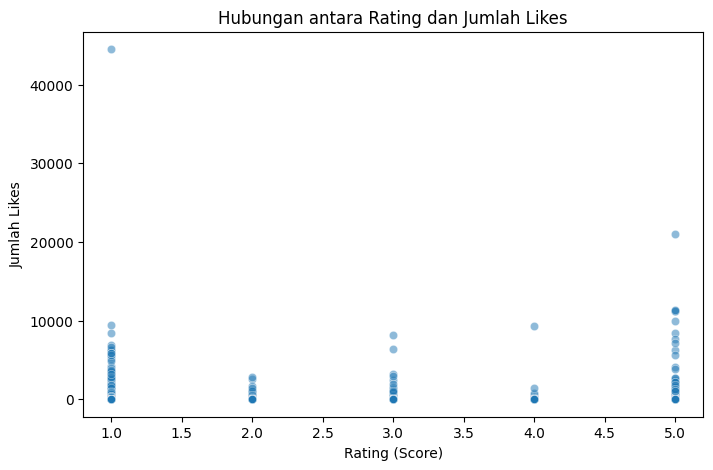

Korelasi antara Rating dan Likes:
                  score  thumbsUpCount
score          1.00000       -0.01141
thumbsUpCount -0.01141        1.00000


In [14]:
# Buat scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['score'], y=df['thumbsUpCount'], alpha=0.5)
plt.xlabel("Rating (Score)")
plt.ylabel("Jumlah Likes")
plt.title("Hubungan antara Rating dan Jumlah Likes")
plt.show()

# Hitung korelasi
correlation = df[['score', 'thumbsUpCount']].corr()
print("Korelasi antara Rating dan Likes:\n", correlation)

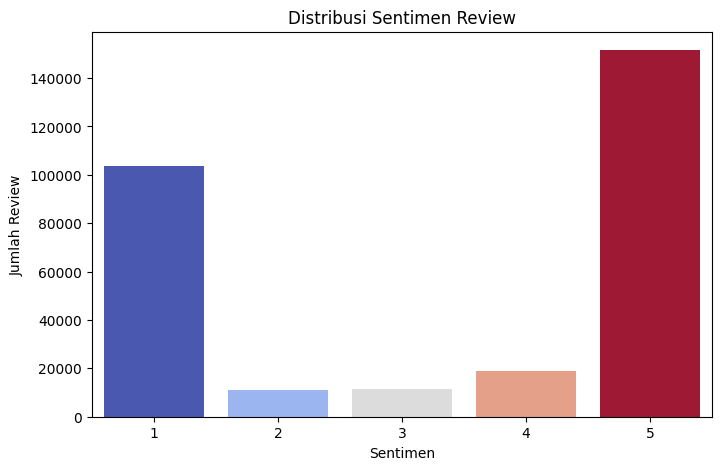

In [16]:
# Kategorikan sentimen berdasarkan rating
def categorize_sentiment(score):
    if score >= 4:
        return "Positif"
    elif score == 3:
        return "Netral"
    else:
        return "Negatif"

df['sentiment'] = df['score'].apply(categorize_sentiment)

# Visualisasi sentimen
plt.figure(figsize=(8, 5))
sns.countplot(x=df['score'], hue=df['score'], palette='coolwarm', legend=False)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review")
plt.show()


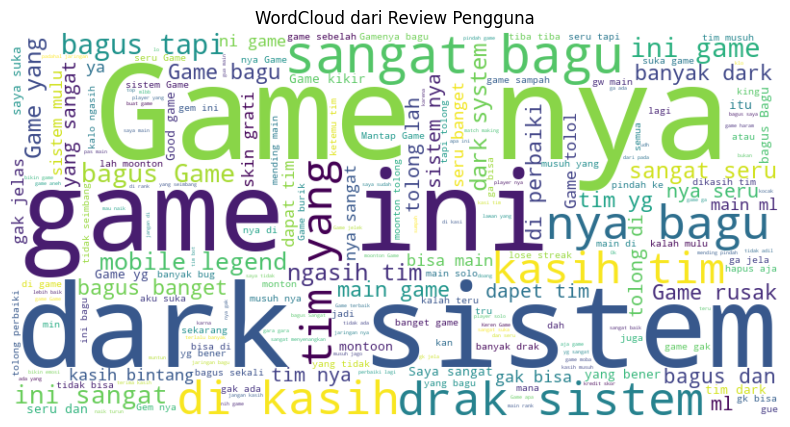

In [18]:
from wordcloud import WordCloud

# Gabungkan semua teks review
text = " ".join(str(review) for review in df['content'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Review Pengguna")
plt.show()